# Import thu vien can thiet

In [159]:
import thunder as td
from thunder import images
%matplotlib inline
import matplotlib.pyplot as plt
from showit import image, tile
from PIL import Image
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
%matplotlib widget

## Spark Config

In [160]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf

# #Spark Config
conf = SparkConf().setAppName("sample_app")
#sc = SparkContext(conf=conf)
sc = SparkContext.getOrCreate();

In [161]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Get data "fish"

In [162]:
#get data
data = td.images.fromexample('fish', engine=sc)

In [200]:
data[0]

Images
mode: spark
dtype: uint8
shape: (1, 2, 76, 87)

In [212]:
projections = data.max_projection(axis=0)
projections[0]

Images
mode: spark
dtype: uint8
shape: (1, 76, 87)

/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rdd = filtered.map(lambda kv: (key_func(kv[0]), kv[1][value_slices]))


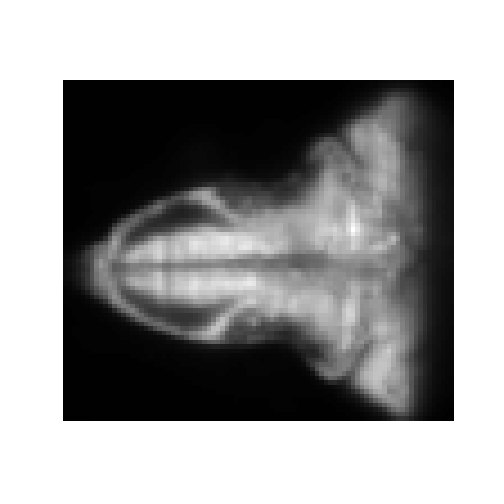

In [165]:
image(projections[0]);

## Blend Selfie image with Fish image

RGB (1519, 1088) PNG


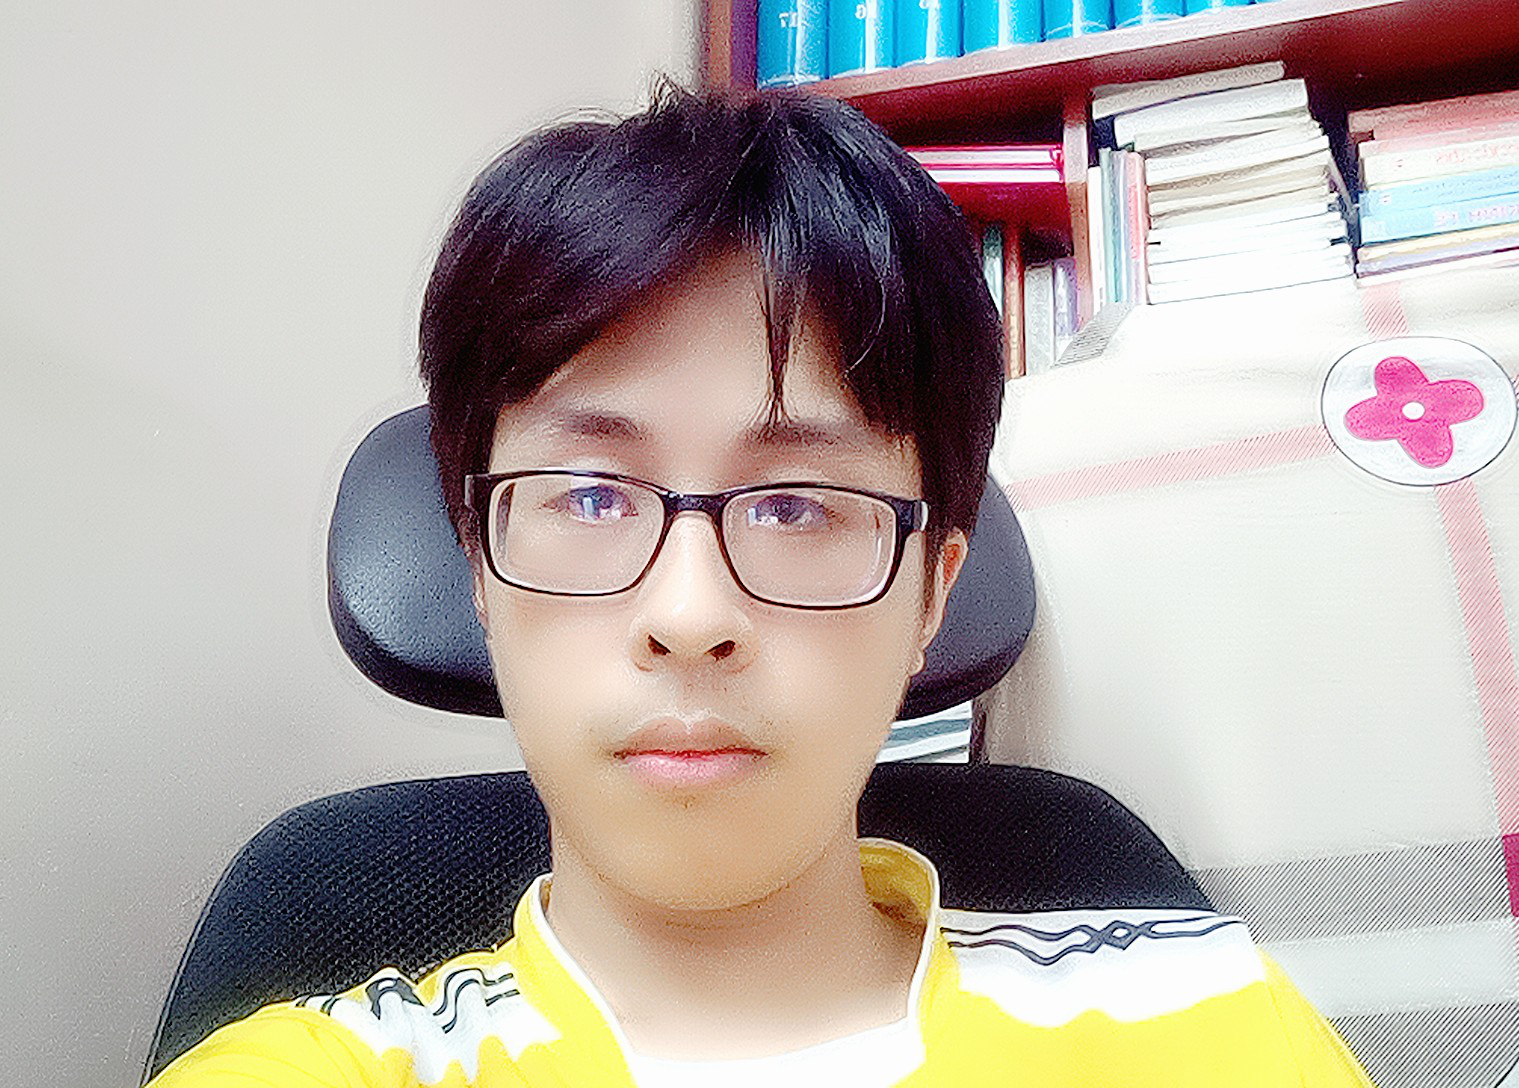

In [246]:
Im = Image.open("selfie2.png")
#Im = Im.convert('L')
print(Im.mode,Im.size,Im.format)
display(Im)

/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rdd = filtered.map(lambda kv: (key_func(kv[0]), kv[1][value_slices]))
/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rdd = filtered.map(lambda kv: (key_func(kv[0]), kv[1][value_slices]))
/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

RGB (1519, 1088) None


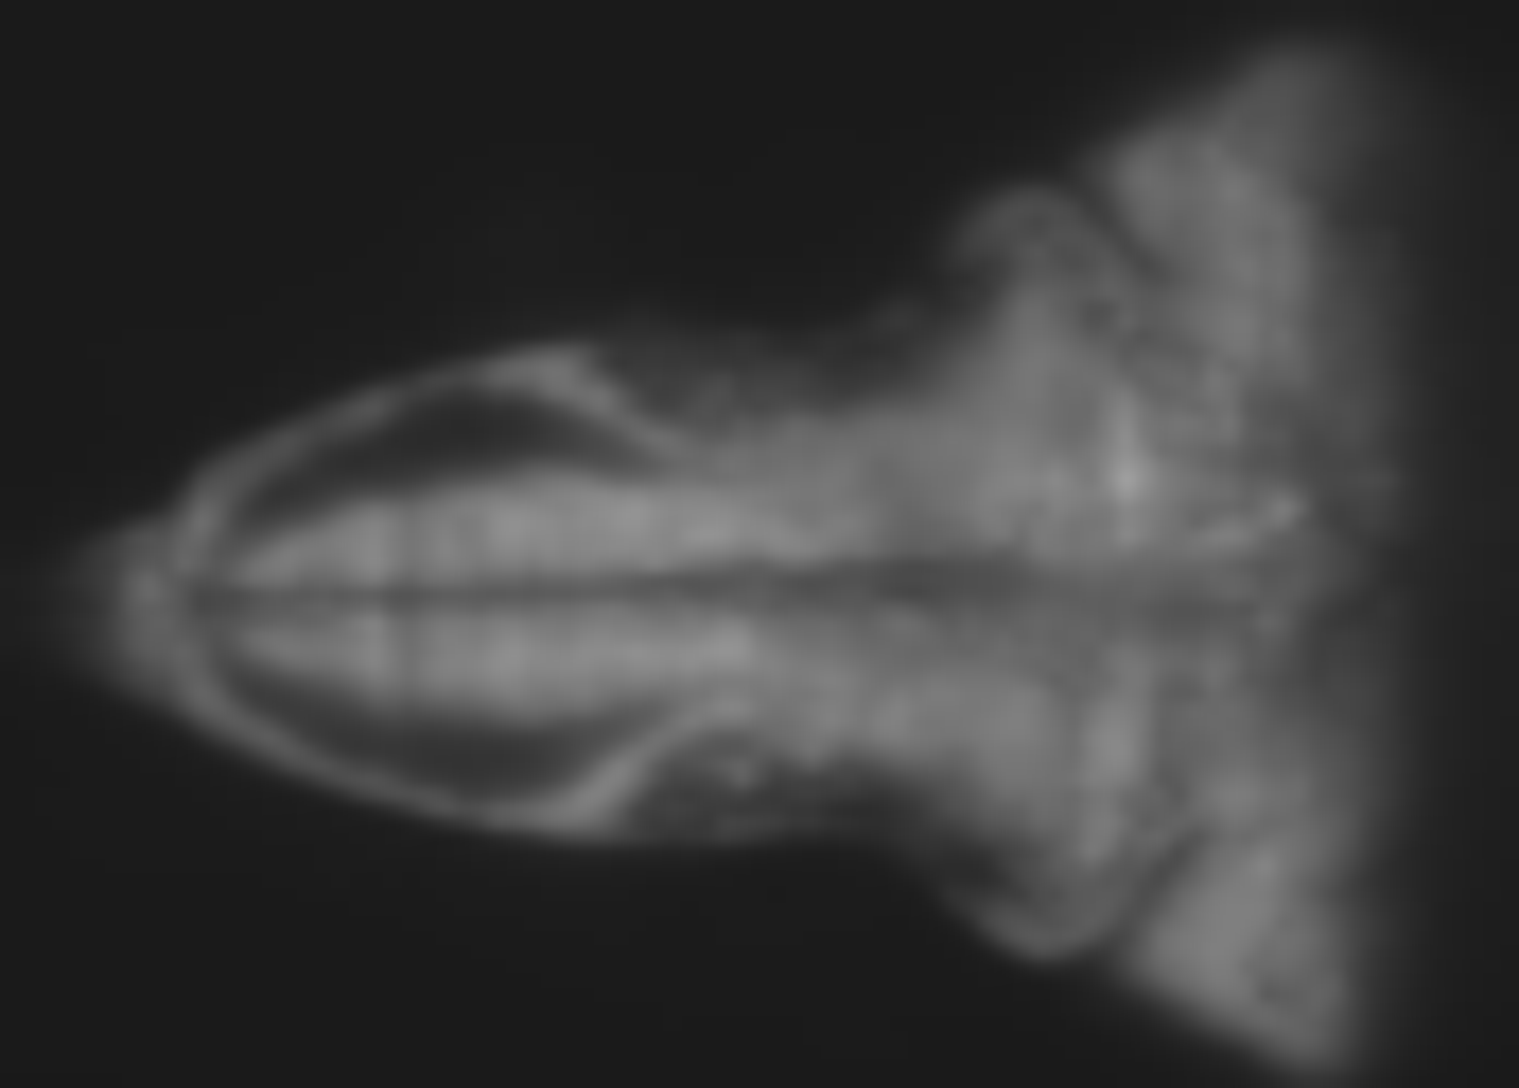

In [247]:
h, w = np.asarray(projections[0]).shape
data = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(3):
    data[:,:,i] = np.asarray(projections[0])
Im2 = Image.fromarray(data,'RGB')
Im2 = Im2.resize(Im.size)
print(Im2.mode,Im2.size,Im2.format)
display(Im2)

In [248]:
#blend
img = Image.blend(Im,Im2,0.5)

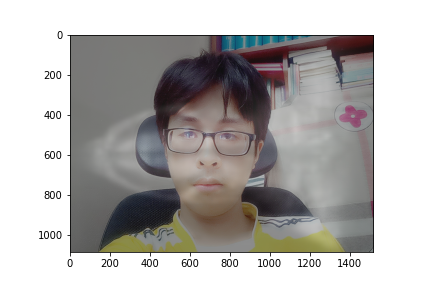

In [249]:
# display the image
fig, ax = plt.subplots()
plt.imshow(img)
plt.show()

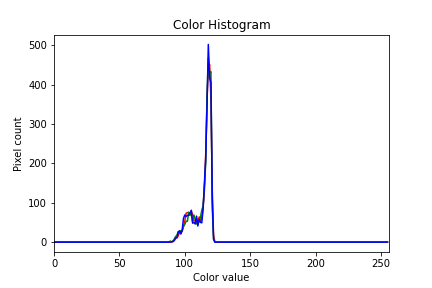

In [250]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

#reshape
img_arr = np.asarray(img)
img_reshape = img_arr[np.newaxis,...]

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_reshape[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()